<a href="https://colab.research.google.com/github/MarianaDuartee/ProjetoFinal/blob/main/1_analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fsspec

In [ ]:
pip install gcsfs

In [3]:
import pandas as pd
import os

In [ ]:

from google.cloud import storage
serviceaccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = serviceaccount

df = pd.read_csv('gs://data_lake_ingest_data/2_temp/Ocorrencias_Vitimas_Frequencia',sep=',')
df

,UF,TotalOcorrencias,TotalVitimas,Media_Freq_15_a_17_anos,Media_Freq_18_a_24_anos,Media_Freq_25_anos_ou_mais
0,Acre,308,313,0.86,0.39,0.09
1,Alagoas,1051,1094,0.85,0.35,0.04
2,Amapá,270,273,0.88,0.42,0.07
3,Amazonas,1053,1064,0.90,0.39,0.07
4,Bahia,4964,5219,0.90,0.43,0.07
5,Ceará,2153,2257,0.88,0.33,0.05
6,Distrito Federal,400,410,0.91,0.44,0.06
7,Espírito Santo,974,1023,0.92,0.47,0.06
8,Goiás,1699,1756,0.87,0.39,0.05
9,Maranhão,1485,1483,0.87,0.35,0.06


Queremos investigar a relação entre o número de ocorrência com as frequências de pessoas que vão a alguma instituição de ensino

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn; seaborn.set()
import seaborn as sns


%matplotlib inline

In [ ]:
df['TotalOcorrencias'].describe()

count      27.000000
mean     1488.333333
std      1236.662910
min       224.000000
25%       514.500000
50%      1051.000000
75%      1984.000000
max      4964.000000
Name: TotalOcorrencias, dtype: float64

In [ ]:
df['Media_Freq_15_a_17_anos'].describe()

count    27.000000
mean      0.893333
std       0.022361
min       0.850000
25%       0.875000
50%       0.900000
75%       0.910000
max       0.940000
Name: Media_Freq_15_a_17_anos, dtype: float64

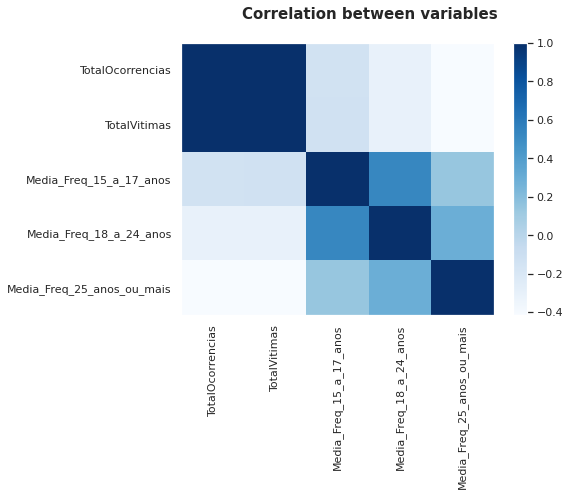

In [ ]:
corr = df.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(7, 5))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

*  ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
*  ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
*  ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
*  ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
*  ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

In [ ]:
df.corr("pearson")

,TotalOcorrencias,TotalVitimas,Media_Freq_15_a_17_anos,Media_Freq_18_a_24_anos,Media_Freq_25_anos_ou_mais
TotalOcorrencias,1.000000,0.999504,-0.138337,-0.309076,-0.410559
TotalVitimas,0.999504,1.000000,-0.136732,-0.306257,-0.413316
Media_Freq_15_a_17_anos,-0.138337,-0.136732,1.000000,0.529551,0.142278
Media_Freq_18_a_24_anos,-0.309076,-0.306257,0.529551,1.000000,0.292215
Media_Freq_25_anos_ou_mais,-0.410559,-0.413316,0.142278,0.292215,1.000000


In [ ]:
df.corr("spearman")

,TotalOcorrencias,TotalVitimas,Media_Freq_15_a_17_anos,Media_Freq_18_a_24_anos,Media_Freq_25_anos_ou_mais
TotalOcorrencias,1.000000,0.998168,-0.183128,-0.310471,-0.549472
TotalVitimas,0.998168,1.000000,-0.188077,-0.301548,-0.567156
Media_Freq_15_a_17_anos,-0.183128,-0.188077,1.000000,0.534619,0.157288
Media_Freq_18_a_24_anos,-0.310471,-0.301548,0.534619,1.000000,0.287607
Media_Freq_25_anos_ou_mais,-0.549472,-0.567156,0.157288,0.287607,1.000000


Concluimos que não há correlação entre as variáveis 'TotalOcorrencias' e 'Media_freq'

===================================================

* Em 2018 foi sancionada a Lei nº 13.675/2018. Sistema Único de Segurança Pública (SUSP).

* O SUSP garante a integração de dados, prevê políticas que melhorem a qualidade de vida dos agentes de segurança e o enfrentamento à criminalidade violenta, além de efetivar o repasse de recursos do Fundo Nacional de Segurança Pública destinados aos estados, ao Distrito Federal e aos municípios.

* Através do uso de teste de hipótese vamos verificar se ouve alteração no número de ocorrência de crimes após a aplicação da lei

In [35]:
serviceaccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = serviceaccount

df_2 = pd.read_json('gs://data_lake_ingest_data/2_temp/temp_pandas_ocorrencias_normalizado.json')
df_2

,UF,TipoCrime,Ano,Mes,Ocorrencias
0,Acre,Estupro,2021,janeiro,39
1,Acre,Furto de veículo,2021,janeiro,55
2,Acre,Homicídio doloso,2021,janeiro,14
3,Acre,Lesão corporal seguida de morte,2021,janeiro,0
4,Acre,Roubo a instituição financeira,2021,janeiro,0
...,...,...,...,...,...
15890,Tocantins,Roubo a instituição financeira,2016,dezembro,0
15891,Tocantins,Roubo de carga,2016,dezembro,1
15892,Tocantins,Roubo de veículo,2016,dezembro,63
15893,Tocantins,Roubo seguido de morte (latrocínio),2016,dezembro,3


In [36]:
df_2['TipoCrime'].unique()

array(['Estupro', 'Furto de veículo', 'Homicídio doloso',
       'Lesão corporal seguida de morte',
       'Roubo a instituição financeira', 'Roubo de carga',
       'Roubo de veículo', 'Roubo seguido de morte (latrocínio)',
       'Tentativa de homicídio'], dtype=object)

In [37]:
filter_tipo_crime = df_2.TipoCrime.isin(['Estupro', 'Homicídio doloso', 'Roubo seguido de morte (latrocínio)', 'Tentativa de homicídio'])

In [39]:
df_2 = df_2.loc[filter_tipo_crime]

In [40]:
df_2['Mes'].unique()

array(['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho',
       'agosto', 'setembro', 'outubro', 'novembro', 'dezembro'],
      dtype=object)

In [41]:
df_2['Mes'] = df_2['Mes'].map({'janeiro': '01_janeiro', 'fevereiro': '02_fevereiro', 'março': '03_março', 'abril': '04_abril', 'maio': '05_maio', 'junho': '06_junho', 'julho': '07_julho', 'agosto': '08_agosto', 'setembro': '09_setembro', 'outubro': '10_outubro', 'novembro': '11_novembro', 'dezembro': '12_dezembro'})

In [42]:
df_2.head()

,UF,TipoCrime,Ano,Mes,Ocorrencias
0,Acre,Estupro,2021,01_janeiro,39
2,Acre,Homicídio doloso,2021,01_janeiro,14
7,Acre,Roubo seguido de morte (latrocínio),2021,01_janeiro,1
8,Acre,Tentativa de homicídio,2021,01_janeiro,10
9,Acre,Estupro,2021,02_fevereiro,23


In [43]:
ocorrencia_antes = df_2.loc[(df_2['Ano'] < 2018)]

In [44]:
mes_antes = df_2.Mes.isin(['01_janeiro', '02_fevereiro', '03_março', '04_abril', '05_maio'])

In [45]:
ano_2018 = df_2.Ano == 2018

In [46]:
ocrr_2018_antes = df_2.loc[ano_2018 & mes_antes]

In [47]:
ocrr_2018_antes

,UF,TipoCrime,Ano,Mes,Ocorrencias
7208,Acre,Estupro,2018,01_janeiro,14
7210,Acre,Homicídio doloso,2018,01_janeiro,51
7215,Acre,Roubo seguido de morte (latrocínio),2018,01_janeiro,2
7216,Acre,Tentativa de homicídio,2018,01_janeiro,8
7217,Acre,Estupro,2018,02_fevereiro,20
...,...,...,...,...,...
10045,Tocantins,Tentativa de homicídio,2018,04_abril,28
10046,Tocantins,Estupro,2018,05_maio,81
10048,Tocantins,Homicídio doloso,2018,05_maio,19
10053,Tocantins,Roubo seguido de morte (latrocínio),2018,05_maio,1


In [48]:
ocrr_antes_merge = pd.concat([ocrr_2018_antes, ocorrencia_antes])

In [49]:
ocrr_antes_merge

,UF,TipoCrime,Ano,Mes,Ocorrencias
7208,Acre,Estupro,2018,01_janeiro,14
7210,Acre,Homicídio doloso,2018,01_janeiro,51
7215,Acre,Roubo seguido de morte (latrocínio),2018,01_janeiro,2
7216,Acre,Tentativa de homicídio,2018,01_janeiro,8
7217,Acre,Estupro,2018,02_fevereiro,20
...,...,...,...,...,...
15885,Tocantins,Tentativa de homicídio,2016,11_novembro,26
15886,Tocantins,Estupro,2016,12_dezembro,36
15888,Tocantins,Homicídio doloso,2016,12_dezembro,31
15893,Tocantins,Roubo seguido de morte (latrocínio),2016,12_dezembro,3


In [51]:
ocrr_antes_merge = ocrr_antes_merge.sort_values(['Ano', 'Mes'])

In [52]:
ocrr_antes_merge

,UF,TipoCrime,Ano,Mes,Ocorrencias
13011,Acre,Estupro,2016,01_janeiro,1
13013,Acre,Homicídio doloso,2016,01_janeiro,18
13018,Acre,Roubo seguido de morte (latrocínio),2016,01_janeiro,1
13019,Acre,Tentativa de homicídio,2016,01_janeiro,1
13119,Alagoas,Estupro,2016,01_janeiro,48
...,...,...,...,...,...
9946,Sergipe,Tentativa de homicídio,2018,05_maio,33
10046,Tocantins,Estupro,2018,05_maio,81
10048,Tocantins,Homicídio doloso,2018,05_maio,19
10053,Tocantins,Roubo seguido de morte (latrocínio),2018,05_maio,1


In [53]:
ocrr_depois = df_2.loc[(df_2['Ano'] > 2018)]

In [54]:
mes_depois = df_2.Mes.isin(['07_julho','08_agosto', '09_setembro', '10_outubro', '11_novembro', '12_dezembro'])

In [55]:
ocrr_2018_depois = df_2.loc[ano_2018 & mes_depois]

In [56]:
ocrr_depois_merge = pd.concat([ocrr_2018_depois, ocrr_depois])

In [59]:
ocrr_depois_merge = ocrr_depois_merge.sort_values(['Ano', 'Mes'])

In [60]:
ocrr_depois_merge

,UF,TipoCrime,Ano,Mes,Ocorrencias
7262,Acre,Estupro,2018,07_julho,16
7264,Acre,Homicídio doloso,2018,07_julho,51
7269,Acre,Roubo seguido de morte (latrocínio),2018,07_julho,0
7270,Acre,Tentativa de homicídio,2018,07_julho,11
7370,Alagoas,Estupro,2018,07_julho,34
...,...,...,...,...,...
1386,Sergipe,Tentativa de homicídio,2021,06_junho,72
1432,Tocantins,Estupro,2021,06_junho,62
1434,Tocantins,Homicídio doloso,2021,06_junho,24
1439,Tocantins,Roubo seguido de morte (latrocínio),2021,06_junho,1


In [61]:
def estrati_estado (data,uf):
  estado = data.UF.isin([uf])
  return estado

df_2.loc[estrati_estado(df_2,'Acre')]

,UF,TipoCrime,Ano,Mes,Ocorrencias
0,Acre,Estupro,2021,01_janeiro,39
2,Acre,Homicídio doloso,2021,01_janeiro,14
7,Acre,Roubo seguido de morte (latrocínio),2021,01_janeiro,1
8,Acre,Tentativa de homicídio,2021,01_janeiro,10
9,Acre,Estupro,2021,02_fevereiro,23
...,...,...,...,...,...
13109,Acre,Tentativa de homicídio,2016,11_novembro,0
13110,Acre,Estupro,2016,12_dezembro,4
13112,Acre,Homicídio doloso,2016,12_dezembro,142
13117,Acre,Roubo seguido de morte (latrocínio),2016,12_dezembro,4


In [62]:
df_2['UF'].unique()

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [63]:
ocrr_antes_merge['Ocorrencias'].describe()

count    3132.000000
mean      111.404853
std       144.709589
min         0.000000
25%        12.000000
50%        55.000000
75%       145.000000
max      1185.000000
Name: Ocorrencias, dtype: float64

In [64]:
ocrr_depois_merge['Ocorrencias'].describe()

count    3871.000000
mean       96.951692
std       134.353312
min         0.000000
25%        11.000000
50%        51.000000
75%       131.000000
max      1306.000000
Name: Ocorrencias, dtype: float64

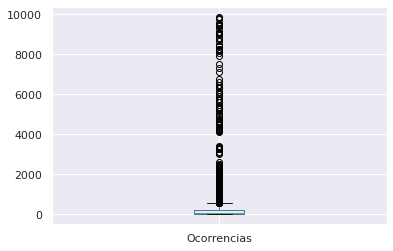

In [ ]:
ocrr_antes_merge[ocrr_antes_merge['Ocorrencias'] > 0]['Ocorrencias'].plot(kind='box')

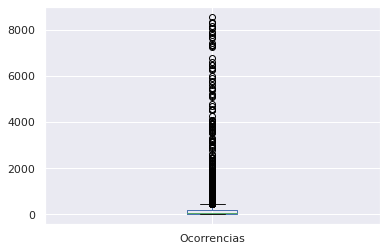

In [ ]:
ocrr_depois_merge[ocrr_depois_merge['Ocorrencias'] > 0]['Ocorrencias'].plot(kind='box')



*   H0: O número de ocorrências não diminuiu depois da Lei
*   H1: O número de ocorrências diminuiu depois da Lei



In [65]:
arr_estados = ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins']

In [66]:
ocrr_antes_merge_estado = ocrr_antes_merge.loc[estrati_estado(ocrr_antes_merge,'Acre')]

In [67]:
stats.shapiro(ocrr_antes_merge_estado['Ocorrencias'].dropna())


(0.5837048292160034, 1.3187804033403964e-16)

In [68]:
def lista_pvalue(df):
  lista_p_valor = []
  for i in arr_estados:
    ocrr_antes_merge_estado = df.loc[estrati_estado(df,i)]
    #print("Estado", i)
    #print(stats.shapiro(ocrr_antes_merge_estado['Ocorrencias'].dropna()))
    shapiro_test = stats.shapiro(ocrr_antes_merge_estado['Ocorrencias'])
    #print(shapiro_test[1])
    lista_p_valor.append(shapiro_test[1])
    #print("---------------")
  return lista_p_valor

In [69]:
lista_pvalue(ocrr_antes_merge)

[1.3187804033403964e-16,
 8.849267629784663e-08,
 3.7699282984249294e-05,
 8.850430077700366e-08,
 2.2734776905508625e-07,
 7.869296325679898e-09,
 1.3709517361348844e-06,
 1.3880904425889184e-08,
 8.180183641570693e-09,
 4.8716669880377594e-06,
 3.7331581381749857e-08,
 3.553251417542924e-07,
 2.0653808974202548e-07,
 1.9767051639973943e-07,
 1.4257668656814104e-10,
 1.2447487485189868e-10,
 1.169546703749802e-05,
 4.834848521539925e-09,
 1.4566531574694563e-12,
 2.2307819687891837e-15,
 1.3974490684631746e-06,
 2.0312304513936397e-06,
 6.364126602420583e-05,
 1.2925475800784625e-07,
 7.600574059019038e-10,
 6.931760708539514e-06,
 1.5744803022244014e-05]

In [70]:
lista_pvalue(ocrr_depois_merge)

[6.684597337880405e-06,
 4.3484360503498465e-06,
 8.113588592095766e-06,
 2.0520321442063505e-08,
 7.517317044403171e-07,
 2.348067056345826e-07,
 2.6189543405052973e-06,
 4.081095426045067e-07,
 1.0005255290934656e-08,
 2.570203889717959e-07,
 1.4861345221106603e-07,
 6.507597238858409e-10,
 1.4001267345520318e-07,
 6.368680374180258e-07,
 7.650729008656931e-12,
 6.44894565266646e-13,
 4.230593653176129e-10,
 8.951867580542228e-10,
 1.564622875704913e-10,
 8.018657786379446e-12,
 5.193207357478968e-07,
 6.11860787103069e-06,
 7.894548303966076e-08,
 5.785440748695692e-07,
 4.849039464231708e-13,
 4.839013634239109e-09,
 1.4303752323030494e-05]

In [71]:
data_pvalue = {'UF': arr_estados, 'pvalue_antes': lista_pvalue(ocrr_antes_merge), 'pvalue_depois': lista_pvalue(ocrr_depois_merge)}
df_pvalue = pd.DataFrame(data=data_pvalue)
df_pvalue

,UF,pvalue_antes,pvalue_depois
0,Acre,1.318780e-16,6.684597e-06
1,Alagoas,8.849268e-08,4.348436e-06
2,Amapá,3.769928e-05,8.113589e-06
3,Amazonas,8.850430e-08,2.052032e-08
4,Bahia,2.273478e-07,7.517317e-07
5,Ceará,7.869296e-09,2.348067e-07
6,Distrito Federal,1.370952e-06,2.618954e-06
7,Espírito Santo,1.388090e-08,4.081095e-07
8,Goiás,8.180184e-09,1.000526e-08
9,Maranhão,4.871667e-06,2.570204e-07


In [72]:
for i in df_pvalue['pvalue_antes']:
  if i > 0.05:
    print("Nornal")
  else:
    print("Não normal")

Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal


In [73]:
for i in df_pvalue['pvalue_depois']:
  if i > 0.05:
    print("Nornal")
  else:
    print("Não normal")

Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal
Não normal


mann-whitney test

In [74]:
from scipy.stats import wilcoxon
arr_man_whit_pvalue = []
for i in arr_estados:
    ocrr_antes_merge_estado = ocrr_antes_merge.loc[estrati_estado(ocrr_antes_merge,i)]
    ocrr_depois_merge_estado = ocrr_depois_merge.loc[estrati_estado(ocrr_depois_merge,i)]
    print("Estado", i)
    #print(stats.shapiro(ocrr_antes_merge_estado['Ocorrencias'].dropna()))
    #shapiro_test = wilcoxon(ocrr_antes_merge['Ocorrencias'])
    shapiro_test, pvalor = stats.mannwhitneyu(ocrr_antes_merge_estado['Ocorrencias'], ocrr_depois_merge_estado['Ocorrencias'], alternative='less')
    print(shapiro_test)
    print(pvalor)
    arr_man_whit_pvalue.append(pvalor)
    print("---------------")
  


Estado Acre
5739.5
6.905539252542011e-06
---------------
Estado Alagoas
9761.0
0.9947518488744151
---------------
Estado Amapá
8954.5
0.9679809225090497
---------------
Estado Amazonas
9171.0
0.9130662676806887
---------------
Estado Bahia
9808.5
0.992184209926556
---------------
Estado Ceará
9074.0
0.8847283614065966
---------------
Estado Distrito Federal
10100.5
0.9981516459871536
---------------
Estado Espírito Santo
8596.5
0.6578350580745616
---------------
Estado Goiás
10372.0
0.999737192132378
---------------
Estado Maranhão
8773.5
0.7581179043667705
---------------
Estado Mato Grosso
10281.0
0.9993175022822893
---------------
Estado Mato Grosso do Sul
9528.0
0.9746107650453337
---------------
Estado Minas Gerais
10906.5
0.9999887891941731
---------------
Estado Pará
9706.5
0.9877168843413098
---------------
Estado Paraíba
9549.5
0.9766126255747303
---------------
Estado Paraná
8408.5
0.5760707793795175
---------------
Estado Pernambuco
9559.0
0.9774377437666696
---------------


In [75]:
data_pvalue_man_whit = {'UF': arr_estados, 'pvalue_mann_whitney': arr_man_whit_pvalue}
df_pvalue_mann_whit = pd.DataFrame(data=data_pvalue_man_whit)
df_pvalue_mann_whit


,UF,pvalue_mann_whitney
0,Acre,0.000007
1,Alagoas,0.994752
2,Amapá,0.967981
3,Amazonas,0.913066
4,Bahia,0.992184
5,Ceará,0.884728
6,Distrito Federal,0.998152
7,Espírito Santo,0.657835
8,Goiás,0.999737
9,Maranhão,0.758118


In [77]:
arr_result = []
for i in df_pvalue_mann_whit['pvalue_mann_whitney']:
  if i > 0.05:
    print("Falha em rejeitar")
    arr_result.append(1)
  else:
    print("Rejeita")
    arr_result.append(0)

Rejeita
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Rejeita
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Falha em rejeitar
Rejeita


In [79]:
data_eficacia = {'UF': arr_estados, 'eficacia_da_lei': arr_result}
df_eficacia_lei = pd.DataFrame(data=data_eficacia)
df_eficacia_lei


,UF,eficacia_da_lei
0,Acre,0
1,Alagoas,1
2,Amapá,1
3,Amazonas,1
4,Bahia,1
5,Ceará,1
6,Distrito Federal,1
7,Espírito Santo,1
8,Goiás,1
9,Maranhão,1


In [80]:
from google.cloud import storage
import os
serviceAccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount


client = storage.Client()
bucket = client.get_bucket('data_lake_ingest_data')
    
bucket.blob('2_temp/temp_df_eficacia_lei').upload_from_string(df_eficacia_lei.to_csv(), 'text/csv')

# Dataset final

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import sklearn

import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns

from fbprophet import Prophet

%matplotlib inline

In [20]:
from google.cloud import storage
serviceaccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = serviceaccount

df_final = pd.read_csv('gs://data_lake_ingest_data/3_output/TabelaFinal',sep=',')
df_final

,UF,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego
0,Piauí,2016,3212180,704,704,17.2,8.044295e+08,5726,10.5,9.43
1,Pernambuco,2016,9410336,4314,4481,12.8,2.657598e+09,20537,10.5,14.55
2,Amazonas,2016,4001667,1150,1154,6.9,1.604732e+09,6285,10.5,13.58
3,Mato Grosso do Sul,2016,2682386,609,639,6.3,1.459525e+09,4779,11.0,7.68
4,Roraima,2016,514229,136,145,6.6,4.089342e+08,1516,11.0,8.80
...,...,...,...,...,...,...,...,...,...,...
95,Goiás,2019,7018354,1699,1756,5.1,3.839270e+09,13220,11.8,10.60
96,São Paulo,2019,45919049,3068,3200,2.6,1.232196e+10,137937,12.3,12.45
97,Alagoas,2019,3337357,1051,1094,17.1,1.159159e+09,3828,10.4,14.90
98,Tocantins,2019,1572866,326,381,9.7,1.119190e+09,2271,11.4,10.82


**Análise descritiva**

In [7]:
df_final.describe()

,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego
count,100.000000,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,2017.500000,7.907760e+06,1894.870000,1959.630000,8.551000,2.975881e+09,20208.890000,11.160000,12.141800
std,1.123666,9.338537e+06,1603.284468,1695.645157,4.945103,3.199381e+09,35027.427448,0.595268,3.013918
min,2016.000000,5.142290e+05,136.000000,145.000000,2.100000,2.881979e+08,0.000000,9.700000,6.080000
25%,2016.750000,2.705457e+06,569.500000,573.250000,5.000000,9.264385e+08,4004.250000,10.700000,10.372500
50%,2017.500000,4.017242e+06,1269.000000,1250.500000,6.450000,1.509771e+09,8665.000000,11.200000,12.100000
75%,2018.250000,9.511488e+06,2921.750000,3054.500000,13.025000,3.689944e+09,21286.750000,11.600000,14.187500
max,2019.000000,4.591905e+07,6449.000000,6803.000000,19.400000,1.283379e+10,198824.000000,12.600000,20.170000


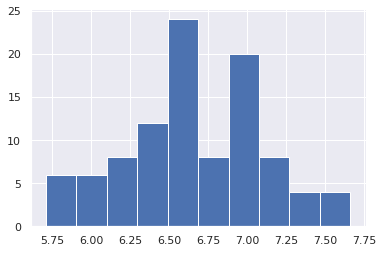

In [9]:
df_final['populacao_estimada'] = df_final['populacao_estimada'].apply(np.log10)
df_final[df_final['populacao_estimada'] > 0]['populacao_estimada'].hist()

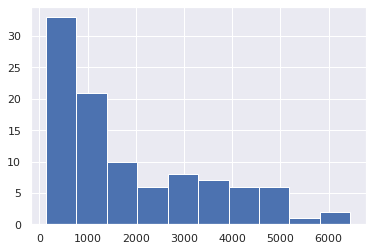

In [10]:
(df_final['Total_Ocorrencias'] ).hist()

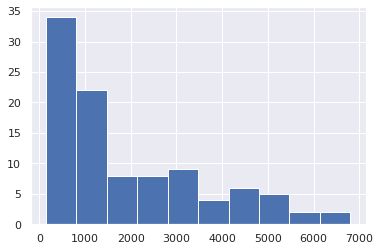

In [11]:
(df_final['Total_Vitimas'] ).hist()

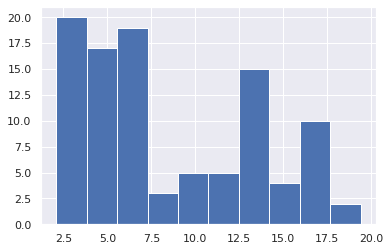

In [12]:
(df_final['Taxa_Analfabetismo'] ).hist()

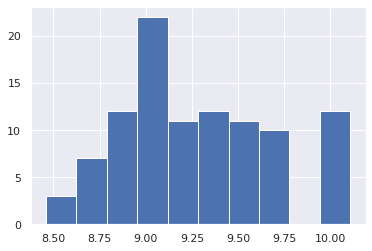

In [13]:
df_final['Investimentos'] = df_final['Investimentos'].apply(np.log10)
df_final[df_final['Investimentos'] > 0]['Investimentos'].hist()

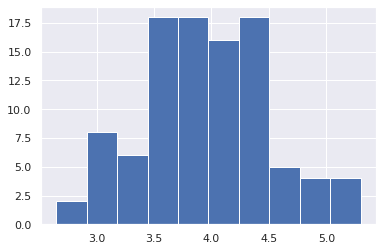

In [15]:
df_final['TotalOcorrencias_Roubos'] = df_final['TotalOcorrencias_Roubos'].apply(np.log10)
df_final[df_final['TotalOcorrencias_Roubos'] > 0]['TotalOcorrencias_Roubos'].hist()


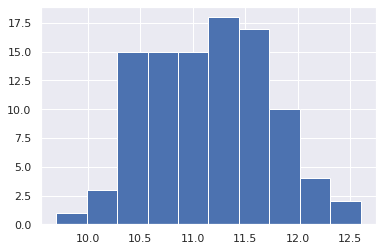

In [16]:
(df_final['Media_Freq_Escolar'] ).hist()

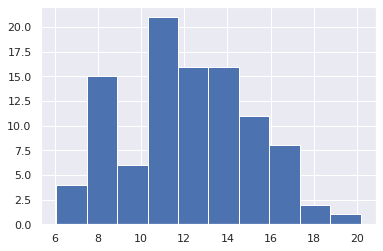

In [17]:
(df_final['TaxaDesemprego'] ).hist()

In [21]:
df_final.loc[(df_final['populacao_estimada'] >= 10000000), 'categoria_populacao'] = 'Muito_populoso'
df_final.loc[(df_final['populacao_estimada'] >= 5000000) & (df_final['populacao_estimada'] < 10000000 ), 'categoria_populacao'] = 'Medio_populoso'
df_final.loc[(df_final['populacao_estimada'] < 5000000 ), 'categoria_populacao'] = 'Pouco_populoso'
df_final.head()

,UF,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego,categoria_populacao
0,Piauí,2016,3212180,704,704,17.2,8.044295e+08,5726,10.5,9.43,Pouco_populoso
1,Pernambuco,2016,9410336,4314,4481,12.8,2.657598e+09,20537,10.5,14.55,Medio_populoso
2,Amazonas,2016,4001667,1150,1154,6.9,1.604732e+09,6285,10.5,13.58,Pouco_populoso
3,Mato Grosso do Sul,2016,2682386,609,639,6.3,1.459525e+09,4779,11.0,7.68,Pouco_populoso
4,Roraima,2016,514229,136,145,6.6,4.089342e+08,1516,11.0,8.80,Pouco_populoso


In [33]:
df_final['TaxaDesemprego'].describe()

count    100.000000
mean      12.141800
std        3.013918
min        6.080000
25%       10.372500
50%       12.100000
75%       14.187500
max       20.170000
Name: TaxaDesemprego, dtype: float64

In [34]:
df_final.loc[(df_final['TaxaDesemprego'] >= 12), 'categoria_desemprego'] = 'Alto_desemprego'
df_final.loc[(df_final['TaxaDesemprego'] >= 8) & (df_final['TaxaDesemprego'] < 12 ), 'categoria_desemprego'] = 'Medio_desemprego'
df_final.loc[(df_final['TaxaDesemprego'] < 8 ), 'categoria_desemprego'] = 'Baixo_desemprego'
df_final.head()

,UF,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego,categoria_populacao,categoria_desemprego
0,Piauí,2016,3212180,704,704,17.2,8.044295e+08,5726,10.5,9.43,Pouco_populoso,Medio_desemprego
1,Pernambuco,2016,9410336,4314,4481,12.8,2.657598e+09,20537,10.5,14.55,Medio_populoso,Alto_desemprego
2,Amazonas,2016,4001667,1150,1154,6.9,1.604732e+09,6285,10.5,13.58,Pouco_populoso,Alto_desemprego
3,Mato Grosso do Sul,2016,2682386,609,639,6.3,1.459525e+09,4779,11.0,7.68,Pouco_populoso,Baixo_desemprego
4,Roraima,2016,514229,136,145,6.6,4.089342e+08,1516,11.0,8.80,Pouco_populoso,Medio_desemprego


In [35]:
df_final['Total_Ocorrencias'].describe()

count     100.000000
mean     1894.870000
std      1603.284468
min       136.000000
25%       569.500000
50%      1269.000000
75%      2921.750000
max      6449.000000
Name: Total_Ocorrencias, dtype: float64

In [36]:
df_final.loc[(df_final['Total_Ocorrencias'] >= 2000), 'categoria_ocorrencias'] = 'Perigoso'
df_final.loc[(df_final['Total_Ocorrencias'] >= 1000) & (df_final['Total_Ocorrencias'] < 2000 ), 'categoria_ocorrencias'] = 'Meio_perigoso'
df_final.loc[(df_final['Total_Ocorrencias'] < 1000 ), 'categoria_ocorrencias'] = 'Pouco_perigoso'
df_final.head()

,UF,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego,categoria_populacao,categoria_desemprego,categoria_ocorrencias
0,Piauí,2016,3212180,704,704,17.2,8.044295e+08,5726,10.5,9.43,Pouco_populoso,Medio_desemprego,Pouco_perigoso
1,Pernambuco,2016,9410336,4314,4481,12.8,2.657598e+09,20537,10.5,14.55,Medio_populoso,Alto_desemprego,Perigoso
2,Amazonas,2016,4001667,1150,1154,6.9,1.604732e+09,6285,10.5,13.58,Pouco_populoso,Alto_desemprego,Meio_perigoso
3,Mato Grosso do Sul,2016,2682386,609,639,6.3,1.459525e+09,4779,11.0,7.68,Pouco_populoso,Baixo_desemprego,Pouco_perigoso
4,Roraima,2016,514229,136,145,6.6,4.089342e+08,1516,11.0,8.80,Pouco_populoso,Medio_desemprego,Pouco_perigoso


In [37]:
df_final['TotalOcorrencias_Roubos'].describe()

count       100.000000
mean      20208.890000
std       35027.427448
min           0.000000
25%        4004.250000
50%        8665.000000
75%       21286.750000
max      198824.000000
Name: TotalOcorrencias_Roubos, dtype: float64

In [38]:
df_final.loc[(df_final['TotalOcorrencias_Roubos'] >= 20000), 'categoria_roubos'] = 'Muito_roubo'
df_final.loc[(df_final['TotalOcorrencias_Roubos'] >= 8000) & (df_final['TotalOcorrencias_Roubos'] < 20000 ), 'categoria_roubos'] = 'Meio_roubo'
df_final.loc[(df_final['TotalOcorrencias_Roubos'] < 8000 ), 'categoria_roubos'] = 'Pouco_roubo'
df_final.head()

,UF,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego,categoria_populacao,categoria_desemprego,categoria_ocorrencias,categoria_roubos
0,Piauí,2016,3212180,704,704,17.2,8.044295e+08,5726,10.5,9.43,Pouco_populoso,Medio_desemprego,Pouco_perigoso,Pouco_roubo
1,Pernambuco,2016,9410336,4314,4481,12.8,2.657598e+09,20537,10.5,14.55,Medio_populoso,Alto_desemprego,Perigoso,Muito_roubo
2,Amazonas,2016,4001667,1150,1154,6.9,1.604732e+09,6285,10.5,13.58,Pouco_populoso,Alto_desemprego,Meio_perigoso,Pouco_roubo
3,Mato Grosso do Sul,2016,2682386,609,639,6.3,1.459525e+09,4779,11.0,7.68,Pouco_populoso,Baixo_desemprego,Pouco_perigoso,Pouco_roubo
4,Roraima,2016,514229,136,145,6.6,4.089342e+08,1516,11.0,8.80,Pouco_populoso,Medio_desemprego,Pouco_perigoso,Pouco_roubo


0.25     569.50
0.50    1269.00
0.75    2921.75
Name: Total_Ocorrencias, dtype: float64

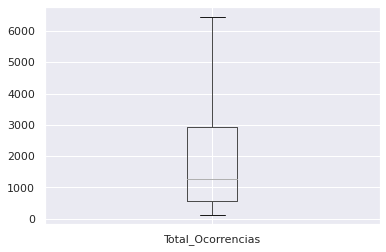

In [22]:
df_final.boxplot(column=['Total_Ocorrencias'])
df_final['Total_Ocorrencias'].quantile([0.25,0.5,0.75])

0.25    2705456.75
0.50    4017241.50
0.75    9511488.25
Name: populacao_estimada, dtype: float64

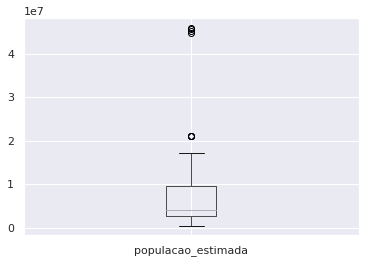

In [23]:
df_final.boxplot(column=['populacao_estimada'])
df_final['populacao_estimada'].quantile([0.25,0.5,0.75])

0.25    9.264385e+08
0.50    1.509771e+09
0.75    3.689944e+09
Name: Investimentos, dtype: float64

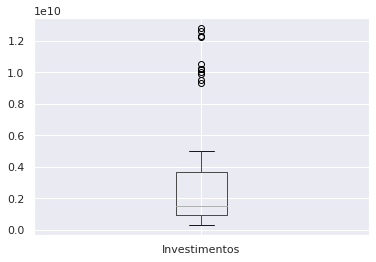

In [24]:
df_final.boxplot(column=['Investimentos'])
df_final['Investimentos'].quantile([0.25,0.5,0.75])

0.25    10.3725
0.50    12.1000
0.75    14.1875
Name: TaxaDesemprego, dtype: float64

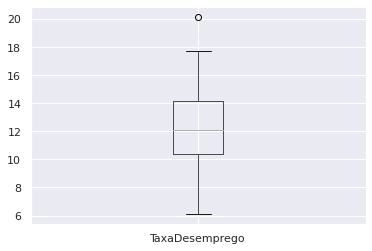

In [25]:
df_final.boxplot(column=['TaxaDesemprego'])
df_final['TaxaDesemprego'].quantile([0.25,0.5,0.75])

**Estatísticas univariadas**

In [26]:
print('Mean: ')
print(df_final[df_final['UF'] == 'Acre']['Total_Ocorrencias'].mean())

print('Median: ')
print(df_final[df_final['UF'] == 'Acre']['Total_Ocorrencias'].median())

print('Mode: ')
print(df_final[df_final['UF'] == 'Acre']['Total_Ocorrencias'].mode())

Mean: 
345.0
Median: 
362.0
Mode: 
0    231
1    308
2    416
3    425
dtype: int64


In [27]:
print('Mean: ')
print(df_final[df_final['UF'] == 'Acre']['Investimentos'].mean())

print('Median: ')
print(df_final[df_final['UF'] == 'Acre']['Investimentos'].median())

print('Mode: ')
print(df_final[df_final['UF'] == 'Acre']['Investimentos'].mode())

Mean: 
596704284.5350001
Median: 
597856120.97
Mode: 
0    4.985347e+08
1    5.683614e+08
2    6.273508e+08
3    6.925702e+08
dtype: float64


In [28]:
print('Mean: ')
print(df_final[df_final['UF'] == 'Acre']['populacao_estimada'].mean())

print('Median: ')
print(df_final[df_final['UF'] == 'Acre']['populacao_estimada'].median())

print('Mode: ')
print(df_final[df_final['UF'] == 'Acre']['populacao_estimada'].mode())

Mean: 
849376.5
Median: 
849442.0
Mode: 
0    816687
1    829619
2    869265
3    881935
dtype: int64


In [29]:
# Intervalo interquartil
def IQR(df, column):
  return df[column].describe()[6] - df[column].describe()[4]

In [30]:
IQR(df_final, 'populacao_estimada')

6806031.5

**Estatísticas bivariadas**

In [31]:
df_final.cov()

,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego
Ano,1.262626e+00,6.010417e+04,-2.427424e+02,-2.029949e+02,-3.328283e-01,3.343813e+07,-2.534045e+03,1.909091e-01,2.694949e-01
populacao_estimada,6.010417e+04,8.720826e+13,9.274417e+09,8.537658e+09,-1.509940e+07,2.767672e+16,3.057002e+11,1.991805e+06,5.646413e+05
Total_Ocorrencias,-2.427424e+02,9.274417e+09,2.570521e+06,2.646146e+06,1.888016e+02,3.381778e+12,2.692565e+07,-1.076921e+02,1.276829e+03
Total_Vitimas,-2.029949e+02,8.537658e+09,2.646146e+06,2.875212e+06,2.403999e+02,3.275251e+12,2.235438e+07,-1.302069e+02,1.279180e+03
Taxa_Analfabetismo,-3.328283e-01,-1.509940e+07,1.888016e+02,2.403999e+02,2.445404e+01,-6.576937e+09,-6.762460e+04,-2.348545e+00,5.680311e+00
Investimentos,3.343813e+07,2.767672e+16,3.381778e+12,3.275251e+12,-6.576937e+09,1.023604e+19,9.636347e+13,7.448291e+08,-1.256420e+08
TotalOcorrencias_Roubos,-2.534045e+03,3.057002e+11,2.692565e+07,2.235438e+07,-6.762460e+04,9.636347e+13,1.226921e+09,8.948935e+03,2.836379e+03
Media_Freq_Escolar,1.909091e-01,1.991805e+06,-1.076921e+02,-1.302069e+02,-2.348545e+00,7.448291e+08,8.948935e+03,3.543434e-01,-5.577960e-01
TaxaDesemprego,2.694949e-01,5.646413e+05,1.276829e+03,1.279180e+03,5.680311e+00,-1.256420e+08,2.836379e+03,-5.577960e-01,9.083700e+00


In [32]:
df_final.corr()

,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego
Ano,1.000000,0.005728,-0.134740,-0.106540,-0.059897,0.009301,-0.064383,0.285415,0.079576
populacao_estimada,0.005728,1.000000,0.619437,0.539169,-0.326968,0.926339,0.934563,0.358307,0.020061
Total_Ocorrencias,-0.134740,0.619437,1.000000,0.973348,0.023813,0.659278,0.479454,-0.112839,0.264235
Total_Vitimas,-0.106540,0.539169,0.973348,1.000000,0.028670,0.603731,0.376374,-0.128999,0.250302
Taxa_Analfabetismo,-0.059897,-0.326968,0.023813,0.028670,1.000000,-0.415702,-0.390410,-0.797832,0.381123
Investimentos,0.009301,0.926339,0.659278,0.603731,-0.415702,1.000000,0.859881,0.391092,-0.013030
TotalOcorrencias_Roubos,-0.064383,0.934563,0.479454,0.376374,-0.390410,0.859881,1.000000,0.429191,0.026867
Media_Freq_Escolar,0.285415,0.358307,-0.112839,-0.128999,-0.797832,0.391092,0.429191,1.000000,-0.310908
TaxaDesemprego,0.079576,0.020061,0.264235,0.250302,0.381123,-0.013030,0.026867,-0.310908,1.000000


In [39]:
from google.cloud import storage
import os
serviceAccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount


client = storage.Client()
bucket = client.get_bucket('data_lake_ingest_data')
    
bucket.blob('3_output/df_final_categorizado').upload_from_string(df_final.to_csv(), 'text/csv')